<!-- dom:TITLE: Polynomial interpolation  -->
# Polynomial interpolation 
<!-- dom:AUTHOR: Anne Kværnø -->
<!-- Author: -->  
**Anne Kværnø**

Date: **Oct 16, 2018**

# Introduction
In the first part of Mathematics 4D/N you learned about the Fourier-series.
By taking the sum of the series from 1 to $N$, you can find an *approximation* to
a periodic function. 
Similar, polynomials can be used to approximate functions over some bounded
interval $x \in [a,b]$. Such polynomials can be used for different purposes.
The function itself may be unknown, and only measured data are available. In
this case, a polynomial may be used to find approximations to intermediate
values of the function. Polynomials are
easy to integrate, and can be used to find approximations of integrals of more complicated
functions. This will be exploited later in the course. And there are plenty of other applications.

In this part of the course, we will only discuss *interpolation polynomials*.

**Interpolation problem.**

Given $n+1$ points $(x_i,y_i)_{i=0}^n$. Find a polynomial $p(x)$ of lowest possible degree
satisfying the *interpolation condition*

<!-- Equation labels as ordinary links -->
<div id="eq:intcond"></div>

$$
\begin{equation} 
    \label{eq:intcond} \tag{1}
    p(x_i) = y_i,\qquad i=0,\dotsc, n. 
\end{equation}
$$

The solution $p(x)$ is called the *interpolation polynomial*, the $x_i$ values
are called *nodes*, and the points $(x_i,y_i)$ *interpolation points*.




**Example 1:** 
Given the points

$$
\begin{array}{c|c|c|c}
x_i & 0 & 2/3 & 1 \\ \hline
y_i & 1 & 1/2 & 0 
\end{array}.
$$

The corresponding interpolation polynomial is

$$
p_2(x)=(-3x^2-x+4)/4
$$

The $y$-values of this example are chosen such that $y_i=\cos{(\pi x_i/2)}$.  So
$p_2(x)$ can be considered as an approximation to $\cos{(\pi x/2)}$ on the interval
$[0,1]$. 


### Content of this note

In this part, we will discuss the following: 
* Method: How to compute the polynomials?

* Existence and uniqueness results. 

* Error analysis: If the polynomial is used to approximate a function, how good is the approximation?

* Improvements: If the nodes $x_i$ can be chosen freely, how should we do it in order to reduce the error? 

## Notation etc.

Let us start with some useful notation and facts about polynomials.  
* A polynomial of degree $n$ is given by

<!-- Equation labels as ordinary links -->
<div id="eq:polynomial"></div>

$$
\begin{equation} \label{eq:polynomial} \tag{2}
 p_n(x) = c_{n}x^n + c_{n-1}x^{n-1} + \cdots + c_1 x_1 + c_0, \qquad  c_i \in
\mathbb{R}, \quad i=0,1,\dotsc,n.
\end{equation}
$$

* $\mathbb{P}_n$ is the set of all polynomials of degree $n$. 

* $C^m[a,b]$ is the set of all continuous functions that have continuous first $m$ derivatives.

* The value $r$ is a root or a zero of a polynomial $p$ if $p(r)=0$.

* A nonzero polynomial of degree $n$ can never have more than $n$ real roots (there may be less).  

* A polynomial of degree $n$ with $n$ real roots $r_1,r_2,\dotsc,r_n$ can be written as

$$
p_n(x) = c(x-r_1)(x-r_2)\dotsm(x-r_n) = c\prod_{i=1}^n(x-r_i).
$$

# Methods
In this section, we present three techniques for finding the interpolation polynomial for a given set of data. 

## The direct approach
For a polynomial of degree $n$ the interpolation condition ([eq:intcond](#eq:intcond)) is a linear systems of 
$n+1$ equations in $n+1$ unknowns:

$$
\sum_{i=0}^n x_j^i c_i = y_j, \qquad j=0,\dotsc, n.
$$

If we are basically interested in the polynomials themself, given by the coefficients $c_i$, $i=0,1,\dotsc, n$, this is a perfectly fine solution. It is for instance the strategy implemented in MATLAB's interpolation routines. However, in this course, polynomial interpolation will be used as a basic tool to construct other algorithms, in particular for integration. In that case, this is not the most convenient option, so we concentrate on a different strategy, which essentially makes it possible to just write up the polynomials. 



## Lagrange interpolation
Given $n+1$ points  $(x_i,y_i)_{i=0}^n$ with distinct $x_i$ values. 
The *cardinal functions* are defined by:

$$
\ell_i(x) = \prod_{j=0,j\not=i}^n \frac{x-x_j}{x_i-x_j}
  = \frac{x-x_0}{x_i-x_0} \dotsm \frac{x-x_{i-1}}{x_i-x_{i-1}}\cdot \frac{x-x_{i+1}}{x_i-x_{i+1}} \dotsm \frac{x-x_n}{x_i-x_n} , \qquad i=0,\dotsc,n.
$$

The cardinal functions have the following properties:
* $\ell_i \in \mathbb{P}_n$, $i=0,1,\dotsc,n$.

* $\ell_i(x_j) = \delta_{ij} = \begin{cases} 1, & \text{when } i=j \\ 0, & \text{when }i\not=j \end{cases}$.

* They are constructed solely from the nodes $x_i$'s.

* They are linearly independent, and thus form a basis for $\mathbb{P}_{n}$.

The interpolation polynomial is now given by

$$
p_n(x) = \sum_{i=0}^n y_i \ell_i(x)
$$

since

$$
p_n(x_j) = \sum_{i=0}^n y_i \ell_i(x_j) = y_j, \qquad j=0,\dotsc,n.
$$

**Example 2:**
Given the points:

$$
\begin{array}{c|ccc}
x_i & 0 & 1 & 3 \\ \hline y_i & 3 & 8 & 6
\end{array}.
$$

The corresponding cardinal functions are given by:

$$
\begin{align*}
  \ell_0(x) & = \frac{(x-1)(x-3)}{(0-1)(0-3)}
           = \frac{1}{3}x^2-\frac{4}{3}x+1 \\ 
  \ell_1(x) & = \frac{(x-0)(x-3)}{(1-0)(1-3)}
           = -\frac12 x^2 + \frac32 x \\ 
  \ell_2(x) &= \frac{(x-0)(x-1)}{(3-0)(3-1)} = \frac16 x^2-\frac16 x
\end{align*}
$$

and the interpolation polynomial is given by (check it yourself):

$$
p_2(x) = 3 \ell_0(x) + 8 \ell_1(x) + 6 \ell_2(x) = -2x^2 + 7x + 3.
$$

## Implementation
The method above is implemented as two functions:
* `cardinal(xdata, x)`: Create a list of cardinal functions $\ell_i(x)$ evaluated in $x$.

* `lagrange(ydata, l)`: Create the interpolation polynomial $p_n(x)$.

Here, `xdata` and `ydata` are arrays with the interpolation points, and `x` is an 
array of values in which the polynomials are evaluated. 

You are not required to understand the implementation of these functions, but you should understand how to use them.

In [9]:
%matplotlib inline

from numpy import *
from matplotlib.pyplot import *
from math import factorial
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
rcParams.update(newparams)

In [15]:
def cardinal(xdata, x):
    """
    cardinal(xdata, x): 
    In: xdata, array with the nodes x_i.
        x, array or a scalar of values in which the cardinal functions are evaluated.
    Return: l: a list of arrays of the cardinal functions evaluated in x. 
    """
    n = len(xdata)              # Number of evaluation points x
    l = []
    for i in range(n):          # Loop over the cardinal functions
        li = ones(len(x))
        for j in range(n):      # Loop to make the product for l_i
            if i is not j:
                li = li*(x-xdata[j])/(xdata[i]-xdata[j])
        l.append(li)            # Append the array to the list            
    return l

def lagrange(ydata, l):
    """
    lagrange(ydata, l):
    In: ydata, array of the y-values of the interpolation points.
         l, a list of the cardinal functions, given by cardinal(xdata, x)
    Return: An array with the interpolation polynomial. 
    """
    poly = 0                        
    for i in range(len(ydata)):
        poly = poly + ydata[i]*l[i]  
    return poly

**Example 3:**
Test the functions on the interpolation points of Example 2.

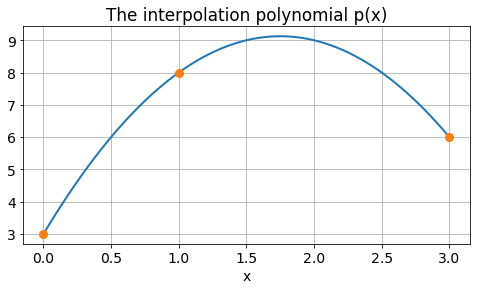

In [21]:
# Example 3
xdata = [0, 1, 3]           # The interpolation points
ydata = [3, 8, 6]
x = linspace(0, 3, 101)     # The x-values in which the polynomial is evaluated
l = cardinal(xdata, x)      # Find the cardinal functions evaluated in x
p = lagrange(ydata, l)      # Compute the polynomial evaluated in x
plot(x, p)                  # Plot the polynomial
plot(xdata, ydata, 'o')     # Plot the interpolation points 
title('The interpolation polynomial p(x)')
xlabel('x');

**Numerical exercises:**
1. Plot the cardinal functions for the nodes of Example 1. 

2. Plot the interpolation polynomials for some points of your own choice.

In [4]:
# Insert your code here (use "+" in the Toolbar menu for more cells)

## Newton interpolation
This is an alternative approach to find the interpolation polynomial.

Let $x_0,x_1,\ldots,x_n$ be $n+1$ distinct real numbers. The so-called Newton form of a polynomial of degree $n$ is an expansion of the form

$$
p(x)=\sum_{i=0}^{n-1} c_{n-i}\prod_{j=0}^{n-1-i}(x-x_j) + c_0,
$$

or more explicitly

$$
p(x)=c_n (x-x_0)(x-x_1)\cdots(x-x_{n-1}) + c_{n-1}(x-x_0)(x-x_1)\cdots(x-x_{n-2}) + \cdots + c_1(x-x_0) + c_0.
$$

In the light of this form of writing a polynomial, the polynomial interpolation problem leads to the following observations. Let us start with a single node $x_0$, then $f(x_0)=p(x_0)=c_0$. Going one step further and consider two nodes $x_0,x_1$. Then we see that $f(x_0)=p(x_0)=c_0$ and $f(x_1)=p(x_1)=c_0 + c_1(x_1-x_0)$. The latter implies that the coefficient

$$
c_1=\frac{f(x_1)-f(x_0)}{x_1-x_0}.
$$

Given three nodes $x_0,x_1,x_2$ yields the coefficients $c_0,c_1$ as defined above, and from

$$
f(x_2)=p(x_2)=c_0 +  c_1(x_2-x_0) +  c_2(x_2-x_0)(x_2-x_1)
$$

we deduce the coefficient

$$
c_2=\frac{f(x_2) - f(x_0) - \frac{f(x_1)-f(x_0)}{x_1-x_0} (x_2-x_0)}{(x_2-x_0)(x_2-x_1)}.
$$

Playing with this quotient gives the much more structured expression

$$
c_2=\frac{\frac{f(x_2)-f(x_1)}{x_2-x_1} - \frac{f(x_1)-f(x_0)}{x_1-x_0}}{(x_2-x_0)}.
$$

This procedure can be continued and yields a so-called triangular systems that permits to define the remaining coefficients $c_3,\ldots,c_n$. One sees quickly that the coefficient $c_k$ only depends on the interpolation points $(x_0,y_0),\ldots,(x_k,y_k)$, where $y_i:=f(x_i)$, $i=0,\ldots,n$.

We introduce the folllwing so-called finite difference notation for a function $f$. The 0th order finite difference is defined to be $f[x_0]:=f(x_0)$. The 1st order finite difference is

$$
f[x_0,x_1]:=\frac{f(x_1)-f(x_0)}{x_1-x_0}.
$$

The second order finite difference is defined by

$$
f[x_0,x_1,x_2]:= \frac{f[x_1,x_2] - f[x_0,x_1]}{x_2-x_0}.
$$

In general, the nth order finite difference of the function $f$ is defined to be

$$
f[x_0,\ldots,x_n]:= \frac{f[x_1,\ldots,x_n] - f[x_0,\ldots,x_{n-1}]}{x_n-x_0}.
$$

Newton's method to solve the polynomial interpolation problem can be summarized as follows. Given $n+1$ interpolation points $(x_0,y_0),\ldots,(x_n,y_n)$, $y_i:=f(x_i)$. If the order $n$ interpolation polynomial is expressed in Newton's form

$$
p_n(x)=c_n (x-x_0)(x-x_1)\cdots(x-x_{n-1}) + c_{n-1}(x-x_0)(x-x_1)\cdots(x-x_{n-2}) + \cdots + c_1(x-x_0) + c_0,
$$

then the coefficients

$$
c_k = f[x_0,\ldots,x_k]
$$

for $k=0,\ldots,n$. In fact, a recursion is in place

$$
p_n(x)=p_{n-1}(x) + f[x_0,\ldots,x_n](x-x_0)(x-x_1)\cdots(x-x_{n-1})
$$

It is common to write the finite differences in a table, which for $n=3$ will
look like:

$$
\begin{array}{c|cccc}
x_0 & f[x_0] & \\ 
    &        & f[x_0,x_1] & \\ 
x_1 & f[x_1] &            & f[x_0,x_1,x_2] \\ 
    &        & f[x_1,x_2] &                & f[x_0,x_1,x_2, x_3] \\ 
x_2 & f[x_2] &            & f[x_1,x_2,x_3] \\ 
    &        & f[x_2,x_3] & \\ 
x_3 & f[x_3] \\ 
\end{array}
$$

**Example 1 again:**
Given the points in Example 1. The corresponding table of divided differences
becomes:

$$
\begin{array}{c|cccc}
0 & 1 & \\ 
    &        & -3/4 & \\ 
2/3 & 1/2 &            &  -3/4 \\ 
    &        & -3/2 &   \\ 
1   & 0 &            
\end{array}
$$

and the interpolation polynomial becomes

$$
p_2(x) = 1 - \frac{3}{4}(x-0)-\frac{3}{4}(x-0)(x-\frac23) =  1 - \frac{1}{4}x -
\frac{3}{4} x^2.
$$

## Implementation
The method above is implemented as two functions:
* `divdiff(xdata, ydata)`: Create the table of divided differences

* `newtonInterpolation(F, xdata, x)`: Evaluate the interpolation polynomial.

Here, `xdata` and `ydata` are arrays with the interpolation points, and `x` is an 
array of values in which the polynomial is evaluated.

In [5]:
def divdiff(xdata,ydata):
    # Create the table of divided differences based
    # on the data in the arrays x_data and y_data. 
    n = len(xdata)
    F = zeros((n,n))
    F[:,0] = ydata             # Array for the divided differences
    for j in range(n):
        for i in range(n-j-1):
            F[i,j+1] = (F[i+1,j]-F[i,j])/(xdata[i+j+1]-xdata[i])
    return F                    # Return all of F for inspection. 
                                # Only the first row is necessary for the
                                # polynomial.

def newton_interpolation(F, xdata, x):
    # The Newton interpolation polynomial evaluated in x. 
    n, m = shape(F)
    xpoly = ones(len(x))               # (x-x[0])(x-x[1])...
    newton_poly = F[0,0]*ones(len(x))  # The Newton polynomial
    for j in range(n-1):
        xpoly = xpoly*(x-xdata[j])
        newton_poly = newton_poly + F[0,j+1]*xpoly
    return newton_poly

Run the code on the example above:

In [6]:
# Example: Use of divided differences and the Newton interpolation
# formula. 
xdata = [0, 2/3, 1]
ydata = [1, 1/2, 0]
F = divdiff(xdata, ydata)      # The table of divided differences
print('The table of divided differences:\n',F)

x = linspace(0, 1, 101)     # The x-values in which the polynomial is evaluated
p = newton_interpolation(F, xdata, x)
plot(x, p)                  # Plot the polynomial
plot(xdata, ydata, 'o')     # Plot the interpolation points 
title('The interpolation polynomial p(x)')
grid(True)
xlabel('x');

# Theory
In this section we cover two theoretical aspects, and give the answer to one natural question:
* Do interpolation polynomials always exist, and when they exist, are they unique?

* If the polynomial is used to approximate a function, can we find an expression for the error?

* How can the error be made as small as possible? 

## Existence and uniqueness of interpolation polynomials.
We have already proved the existence of such polynomials, simply by constructing
them. But are they unique? 

Suppose there exist two different interpolation polynomials $p_n$ and $q_n$ of
degree $n$ interpolating the same $n+1$ points. The polynomial $r(x) = p_n(x)-q_n(x)$ is of degree $n$
with zeros in all the nodes $x_i$, that is a total of $n+1$ zeros. But then
$r\equiv 0$, and the two polynomials $p_n$ and $q_n$ are identical. 
We have then proved the following result:

**Theorem: Existence and uniqueness.**

Given $n+1$ points $(x_i,y_i)_{i=0}^n$ with distinct $x$ values. Then there is
one and only one polynomial $p_n(x) \in \mathbb{P}_n$ satisfying the
interpolation condition

$$
p_n(x_i) = y_i, \qquad i=0,\dotsc, n.
$$

## Error Analysis
Given some function $f\in C[a,b]$. Choose $n+1$ distinct nodes in $[a,b]$ and let $p_n(x) \in \mathbb{P}_n$ satisfy the interpolation condition

$$
p_n(x_i) = f(x_i), \qquad i=0,\dots,n.
$$

What can be said about the error $e(x)=f(x)-p_n(x)$? 

Let us start with an numerical experiment, to have a certain feeling of what to expect. 

**Example 4:**

Let $f(x)=\sin(x)$, $x\in [0,2\pi]$. Choose $n+1$ equidistributed nodes, that is $x_i=ih$, $i=0,\dots,n$, and $h=2\pi/n$. Calculate the interpolation polynomial by use of the functions `cardinal` and `lagrange`. Plot the error $e_n(x)=f(x)-p_n(x)$ for different values of $n$. Choose  $n=4,8,16$ and $32$.  Notice how the error is distributed over the interval, and find the maximum error $\max_{x\in[a,b]}|e_n(x)|$ for each $n$.

Max error is 1.20e-03


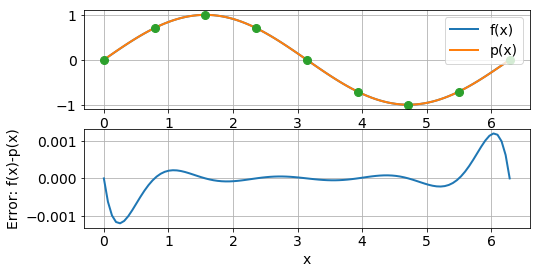

In [16]:
# Example 4

# Define the function
def f(x):
    return sin(x)

# Set the interval 
a, b = 0, 2*pi                  # The interpolation interval
x = linspace(a, b, 101)         # The 'x-axis' 

# Set the interpolation points
n = 8                           # Interpolation points
xdata = linspace(a, b, n+1)     # Equidistributed nodes (can be changed)
ydata = f(xdata)                

# Evaluate the interpolation polynomial in the x-values
l = cardinal(xdata, x)  
p = lagrange(ydata, l)

# Plot f(x) og p(x) and the interpolation points
subplot(2,1,1)                  
plot(x, f(x), x, p, xdata, ydata, 'o')
legend(['f(x)','p(x)'])
grid(True)

# Plot the interpolation error
subplot(2,1,2)
plot(x, (f(x)-p))
xlabel('x')
ylabel('Error: f(x)-p(x)')
grid(True)
print("Max error is {:.2e}".format(max(abs(p-f(x)))))

**Numerical exercise:**
* Repeat the experiment with Runge's function

$$
f(x) = \frac{1}{1+x^2}, \qquad x\in [-5,5].
$$

Max error is 1.64e-02


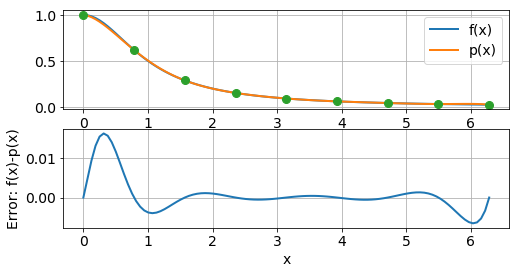

In [17]:
# Example 5

# Define the function
def f(x):
    return 1/(1 + x**2)

# Set the interval 
a, b = 0, 2*pi                  # The interpolation interval
x = linspace(a, b, 101)         # The 'x-axis' 

# Set the interpolation points
n = 8                           # Interpolation points
xdata = linspace(a, b, n+1)     # Equidistributed nodes (can be changed)
ydata = f(xdata)                

# Evaluate the interpolation polynomial in the x-values
l = cardinal(xdata, x)  
p = lagrange(ydata, l)

# Plot f(x) og p(x) and the interpolation points
subplot(2,1,1)                  
plot(x, f(x), x, p, xdata, ydata, 'o')
legend(['f(x)','p(x)'])
grid(True)

# Plot the interpolation error
subplot(2,1,2)
plot(x, (f(x)-p))
xlabel('x')
ylabel('Error: f(x)-p(x)')
grid(True)
print("Max error is {:.2e}".format(max(abs(p-f(x)))))

Let us now see if we can find an expression for the error $e(x)=f(x)-p_n(x)$.
Assume that the nodes $x_i \in [a,b]$, $i=0,\dotsc,n$ are distinct, and that $f$
is sufficiently differentiable, that is $f \in C^r[a,b]$. How differentiable will be clear as we go. 

Define the function

$$
\omega(x) = \prod_{i=0}^{n}(x-x_i) = x^{n+1} + \dotsm.
$$

Clearly, the error in the nodes, $e(x_i)=0$. 
Choose an *arbitrary* $x\in [a,b]$, $x\in [a,b]$, where $x\not=x_i$,
$i=0,1,\dotsc,n$. For this fixed $x$, define a function in $t$ as:

$$
\varphi(t) = e(t)\omega(x) - e(x)\omega(t).
$$

where $e(t) = f(t)-p_n(t)$.
Notice that $\varphi(t)$ is as differentiable with respect to $t$ as $f(t)$. The
function $\varphi(t)$ has $n+2$ distinct zeros (the nodes and the fixed x). As a
consequence of [Rolle's theorem](https://en.wikipedia.org/wiki/Rolle's_theorem),  the derivative
$\varphi'(t)$ has at least $n+1$ distinct zeros, one between each of the zeros
of $\varphi(t)$. So $\varphi''(t)$ has $n$ distinct
zeros, etc. By repeating this argument, we can see that $\varphi^{n+1}(t)$
has at least one zero in $[a,b]$, let us call this $\xi(x)$, as it do depend on the fixed $x$. 
 Since
$\omega^{(n+1)}(t)=(n+1)!$ and $e^{(n+1)}(t)=f^{(n+1)}(t)$ we can conclude that

$$
\varphi^{(n+1)}(\xi)= 0 = f^{(n+1)}(\xi)\omega(x) - e(x)(n+1)!,
$$

The argument above is valid if $f$ is $n+1$ continuous
differentiable on $[a,b]$. Altogether we have proved the following:

**Theorem: Interpolation error.**

Given $f \in C^{(n+1)}[a,b]$. Let $p_{n} \in \mathbb{P}_n$ interpolate $f$ in
$n+1$ distinct nodes $x_i \in [a,b]$. For each $x\in [a,b]$ there is at least
one $\xi(x) \in (a,b)$ such that

$$
f(x) - p_n(x) = \frac{f^{(n+1)}(\xi(x))}{(n+1)!}\prod_{i=0}^n(x-x_i).
$$

The interpolation error consists of three elements: The derivative of the
function $f$, the number of interpolation points $n+1$ and the distribution of
the nodes $x_i$. We cannot do much with the first of these, but we can choose
the two others. Let us first look at the most obvious choice of nodes.

### Equidistributed nodes

The nodes are *equidistributed* over the interval $[a,b]$ if $x_i=a+ih$, $h=(b-a)/n$. In this case it can
be proved that:

$$
|\omega(x)| \leq \frac{h^{n+1}}{4}n!
$$

such that

$$
|e(x)| \leq \frac{h^{n+1}}{4(n+1)}M, \qquad M=\max_{x\in[a,b]}|f^{(n+1)}(x)|.
$$

for all $x\in [a,b]$. 

Let us now see how good this error bound is by an example.

**Example 5:**
Let again $f(x)=\sin(x)$ and $p_n(x)$ the polynomial interpolating $f(x)$ in
$n+1$ equidistributed points. Find an upper bound for the error for different values of $n$. 

Clearly,
$\max_{x\in[0,2\pi]}|f^{(n+1)}(x)|=M=1$ for all $n$, so

$$
|e_n(x)| = |f(x)-p_n(x)| \leq
\frac{1}{4(n+1)}\left(\frac{2\pi}{n}\right)^{n+1}, \qquad x\in[a,b].
$$

Use the code in Example 4 to verify the result. How close is the bound to the real error? 

## Optimal choice of interpolation points
So how can the error be reduced? For a given $n$ there is only one choice: to
distribute the nodes in order to make
$|\omega(x)|= \prod_{j=0}^{n}|x-x_i|$ as small as possible. We will first do this
on a standard interval $[-1,1]$, and then transfer the results to some arbitrary
interval $[a,b]$.

Let us start taking a look at $\omega(x)$ for equidistributed nodes on the
interval $[-1,1]$, for
different values of $n$:

In [10]:
def omega(xdata, x):
    # compute omega(x) for the nodes in xdata
    n1 = len(xdata)
    omega_value = ones(len(x))             
    for j in range(n1):
        omega_value = omega_value*(x-xdata[j])  # (x-x_0)(x-x_1)...(x-x_n)
    return omega_value

n =  3, max|omega(x)| = 3.85e-01


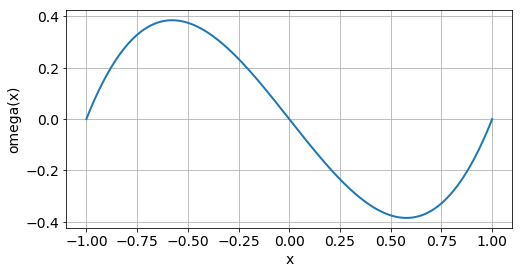

In [13]:
# Plot omega(x) 
n = 3
a, b = -1, 1                    # The interval
x = linspace(a, b, 501)        
xdata = linspace(a, b, n) 
plot(x, omega(xdata, x))
grid(True)
xlabel('x')
ylabel('omega(x)')
print("n = {:2d}, max|omega(x)| = {:.2e}".format(n, max(abs(omega(xdata, x)))))

Run the code for different values of $n$. Notice the following: 
* $\max_{x\in[-1,1]} |\omega(x)|$ becomes smaller with increasing $n$. 

* $|\omega(x)|$ has its maximum values near the boundaries of $[-1, 1]$.

A a consequence of the latter, it seems reasonable to move the nodes towards the boundaries. 
It can be proved that the optimal choice of nodes are the *Chebyshev-nodes*, given by

$$
\tilde{x}_i = \cos \left( \frac{(2i+1)\pi}{2(n+1)} \right), \qquad i=0,\dotsc,n
$$

Let $\omega_{Cheb}(x) = \prod_{j=1}^n(x-\tilde{x}_i)$. It is then possible to prove that

$$
\frac{1}{2^{n}} = \max_{x\in [-1, 1]} |\omega_{Cheb}(x)| \leq \max_{x \in [-1, 1]} |q(x)|
$$

for all polynomials $q\in \mathbb{P}_n$ such that $q(x)=x^n + c_{n-1}x^{n-1}+\dotsm+c_1x + c_0$. 

The distribution of nodes can be transferred to an interval $[a,b]$ by the linear transformation

$$
x = \frac{b-a}{2}\tilde{x} + \frac{b+a}{2}
$$

where $x\in[a,b]$ and $\tilde{x} \in [-1,1]$. By doing so we get

$$
\omega(x) = \prod_{j=0}^n (x-x_i) =
  \left(\frac{b-a}{2}\right)^{n+1} \prod_{j=0}^n (\tilde{x}-\tilde{x}_i)
  = \left(\frac{b-a}{2}\right)^{n+1} \omega_{Cheb}(\tilde{x}).
$$

From the theorem on interpolation errors we can conclude:

**Theorem (interpolation error for Chebyshev interpolation).**

Given $f \in C^{(n+1)}[a,b]$, and let $M_{n+1} = \max_{x\in [a,b]}|f^{(n+1)}(x)|$.  Let $p_{n} \in \mathbb{P}_n$ interpolate $f$ i $n+1$ Chebyshev-nodes $x_i \in [a,b]$. Then

$$
\max_{x\in[a,b]}|f(x) - p_n(x)| \leq \frac{(b-a)^{n+1}}{2^{2n+1}(n+1)!} M_{n+1}.
$$

The Chebyshev nodes over an interval $[a,b]$ are evaluated in the following function:

In [22]:
def chebyshev_nodes(a, b, n):
    # n Chebyshev nodes in the interval [a, b] 
    i = array(range(n))                 # i = [0,1,2,3, ....n-1]
    x = cos((2*i+1)*pi/(2*(n)))         # nodes over the interval [-1,1]
    return 0.5*(b-a)*x+0.5*(b+a)        # nodes over the interval [a,b]

**Numerical exercises:**
1. Plot $\omega_{Cheb}(x)$ for $3, 5, 9, 17$ interpolation points.

2. Repeat Example 3 using Chebyshev interpolation on the functions below. Compare with the results you got from equidistributed nodes.

$$
\begin{align*}
  f(x) &= \sin(x), && x\in[0,2\pi] \\ 
  f(x) &= \frac{1}{1+x^2}, && x\in[-5,5]. 
\end{align*}
$$

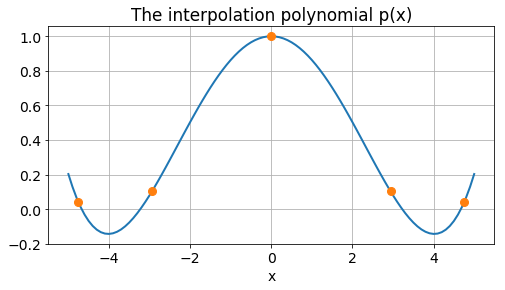

In [27]:
# Example 3

def function1(x):
    return sin(x)

def function2(x):
    return 1/(1 + x**2)

start, end = -5, 5

xdata = chebyshev_nodes(start, end, 5)
ydata = [function2(x) for x in xdata]

x = linspace(start, end, 101)     # The x-values in which the polynomial is evaluated
l = cardinal(xdata, x)      # Find the cardinal functions evaluated in x
p = lagrange(ydata, l)      # Compute the polynomial evaluated in x
plot(x, p)                  # Plot the polynomial
plot(xdata, ydata, 'o')     # Plot the interpolation points 
title('The interpolation polynomial p(x)')
xlabel('x');

**For information**: 
[Chebfun](http://www.chebfun.org/) is software package which makes it possible to manipulate functions and to solve equations with accuracy close to machine accuracy. The algorithms are based on polynomial interpolation in Chebyshev nodes.